In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#解决中文显示问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [34]:
titanic = pd.read_csv(r'C:\Users\Administrator\Desktop\seaborn-data-master\titanic.csv',encoding="gbk") 

In [35]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
print(titanic['sex'].unique())
print(titanic['pclass'].unique())
print(titanic['survived'].unique())

['male' 'female']
[3 1 2]
[0 1]


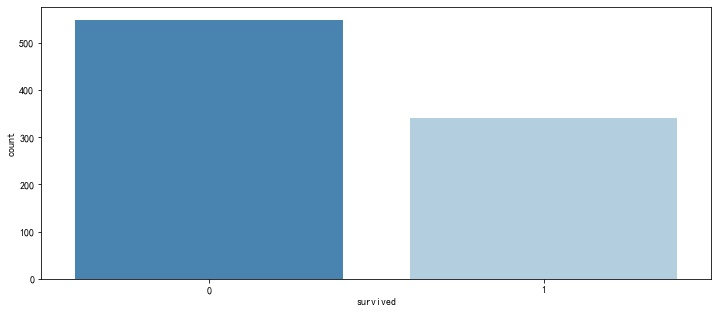

In [37]:
plt.figure(figsize=(12,5))
sns.countplot('survived',data=mask,order = mask['survived'].value_counts().index,palette='Blues_r')

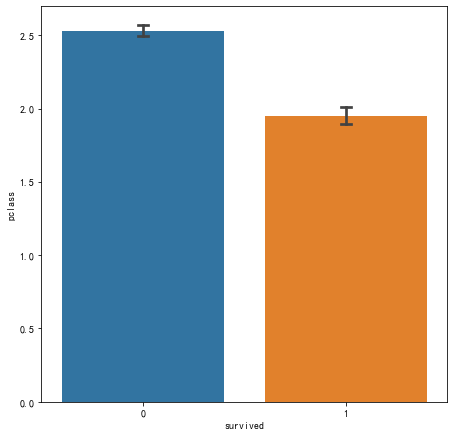

In [38]:
from numpy import median

fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(2,2,1)
sns.barplot(x="survived", y="pclass",data=mask, estimator=mean,ci=75,capsize = 0.05) 
plt.title('')


#plt.savefig('bar.png',dpi=500)
plt.show()

In [41]:
titanic_dummy = pd.get_dummies(mask[['who', 'embarked','alone']])

In [42]:
titanic_conti = pd.DataFrame(titanic, columns=['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], index=titanic.index)
titanic = titanic_conti.join(titanic_dummy)

In [43]:
titanic

,survived,pclass,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,False,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,True,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,True,0,0,1,0,0,1
888,0,3,NaN,1,2,23.4500,False,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,True,0,1,0,1,0,0


In [51]:

titanic = titanic.dropna()#删除缺失值

In [52]:
titanic

,survived,pclass,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,False,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,True,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,0,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,True,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,True,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,True,0,1,0,1,0,0


In [53]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection#拆分训练集和测试集
from sklearn.metrics import confusion_matrix#输出混淆矩阵

In [54]:
titanic_dummy = pd.get_dummies(titanic[['who', 'embarked','alone']])

KeyError: "['embarked', 'who'] not in index"

In [55]:
titanic_conti = pd.DataFrame(titanic, columns=['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], index=titanic.index)
titanic = titanic_conti.join(titanic_dummy)

In [56]:
titanic

,survived,pclass,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,False,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,True,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,0,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,True,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,True,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,True,0,1,0,1,0,0


In [57]:
X = titanic.iloc[:, 1:]
y = titanic.iloc[:, 0]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
# 基于训练集使用逻辑回归建模
classifier = LogisticRegression(random_state=0,solver='liblinear')
classifier.fit(X_train, y_train)
 
# 将模型应用于测试集并查看混淆矩阵
y_pred = classifier.predict(X_test)

In [59]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)  

[[108  17]
 [ 24  66]]


In [60]:
classifier.score(X_test, y_test)#正确率

0.8093023255813954